# *ANN -Artificial Neural Network*

### *Analysis objective :<br>Applying -ANN- model on the prediction of -gender- as a target Feature*
---

In [1]:
import pandas as pd
from matplotlib import pyplot  as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
matplotlib.rcParams["figure.figsize"]=(20,10)
import os
from sklearn.preprocessing import LabelEncoder,StandardScaler
LabelEncoder_category=LabelEncoder()
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import (r2_score,accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix)
import warnings
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

In [406]:
df=pd.read_csv(r"C:/Users/Omar\Desktop/Omar_Files/Python_Analysis/DeepLearning_ANN/DataSet/data_car.csv")
df=df.drop(["X_OBSTAT_","clm","numclaims"],axis=1)
df.head()

,veh_value,exposure,claimcst0,veh_body,veh_age,gender,area,agecat
0,1.06,0.303901,0.0,HBACK,3,F,C,2
1,1.03,0.648871,0.0,HBACK,2,F,A,4
2,3.26,0.569473,0.0,UTE,2,F,E,2
3,4.14,0.317591,0.0,STNWG,2,F,D,2
4,0.72,0.648871,0.0,HBACK,4,F,C,2


In [407]:
df=df.sort_values(by=['area','gender']).reset_index().drop("index",axis=1)
df.head()

,veh_value,exposure,claimcst0,veh_body,veh_age,gender,area,agecat
0,1.03,0.648871,0.0,HBACK,2,F,A,4
1,0.52,0.361396,0.0,HBACK,4,F,A,3
2,1.30,0.999316,0.0,HBACK,2,F,A,2
3,2.17,0.536619,0.0,SEDAN,2,F,A,4
4,1.90,0.854209,0.0,SEDAN,1,F,A,4


---

In [408]:

categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

print("we have {} numerical features : {}\n".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 5 numerical features : ['veh_value', 'exposure', 'claimcst0', 'veh_age', 'agecat']

we have 3 categorical features : ['veh_body', 'gender', 'area']


In [409]:
discrete_feature=[feature for feature in numerical_features if  len(df[feature].unique())<=25]
countinuous_feature=[feature for feature in numerical_features if  len(df[feature].unique())>25]

In [410]:
print("we have {} discrete feature : {}\n".format(len(discrete_feature),(discrete_feature)))
print("we have {} countinuous feature : {}".format(len(countinuous_feature),(countinuous_feature)))

we have 2 discrete feature : ['veh_age', 'agecat']

we have 3 countinuous feature : ['veh_value', 'exposure', 'claimcst0']


In [411]:
categories_encoder=LabelEncoder()
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])

In [412]:
x=df.drop("area",axis=1)
y=df["area"]

In [413]:
x[countinuous_feature].skew(axis=0,skipna=True)

veh_value     2.968022
exposure      0.175557
claimcst0    17.502503
dtype: float64

In [414]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson")
transform_features=['veh_value']
df[transform_features]=pt.fit_transform(x[transform_features])

In [415]:
df[transform_features].skew(axis=0,skipna=True)

veh_value    0.010369
dtype: float64

In [416]:
from imblearn.combine import SMOTETomek,SMOTEENN
smt=SMOTEENN(random_state=42,sampling_strategy="minority")
x_re,y_res=smt.fit_resample(x,y)

In [417]:
x_train, x_test, y_train, y_test = train_test_split(x_re,y_res ,test_size= 0.2,random_state=42)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (7520, 7) and Y = (7520,) : 
Test data shape of X = (1880, 7) and Y = (1880,) : 


In [418]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

* *Importing Tensorflow :*

In [419]:
import tensorflow as tf

In [420]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

* *Model Preparation :*

In [421]:
classifier=Sequential()

* *1st Hidden Layer :*

In [422]:
classifier.add(Dense(units=7,activation="ReLU"))

* *2nd Hidden Layer :*

In [423]:
classifier.add(Dense(units=14,activation="ReLU"))

* *Last Layer -Output :*

In [424]:
classifier.add(Dense(6,activation="softmax"))

* *Adam Optimizer Preparation :*

In [425]:
import tensorflow
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

* *Compiling the Model :*

In [426]:
classifier.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
# categorical_crossentropy

* *Early Stopping Preparation :*

In [427]:
import tensorflow
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

* *Model Fitting :*

In [428]:
model_history=classifier.fit(x_train,y_train,validation_split=.33,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
158/158 [==============================] - 1s 3ms/step - loss: 0.5141 - accuracy: 0.8755 - val_loss: 0.4035 - val_accuracy: 0.8868
Epoch 2/1000
158/158 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8879 - val_loss: 0.3798 - val_accuracy: 0.8872
Epoch 3/1000
158/158 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8900 - val_loss: 0.3787 - val_accuracy: 0.8828
Epoch 4/1000
158/158 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8884 - val_loss: 0.3682 - val_accuracy: 0.8852
Epoch 5/1000
158/158 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8910 - val_loss: 0.3634 - val_accuracy: 0.8820
Epoch 6/1000
158/158 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8888 - val_loss: 0.3675 - val_accuracy: 0.8860
Epoch 7/1000
158/158 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8884 - val_loss: 0.3647 - val_accuracy:

In [429]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

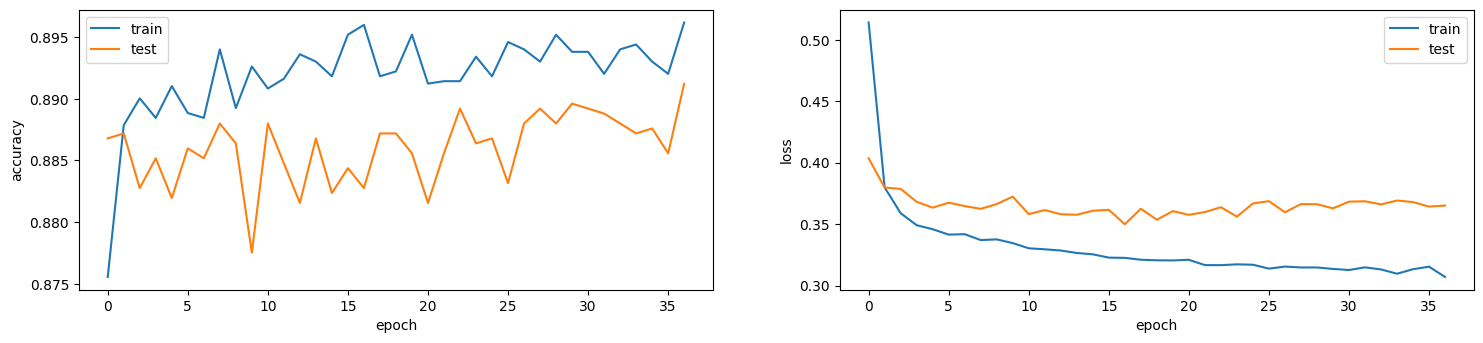

In [430]:
plt.figure(figsize=(18, 8))
plt.subplot(221)
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"]);


plt.subplot(222)
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"]);

In [431]:
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 7)                 56        
                                                                 
 dense_28 (Dense)            (None, 14)                112       
                                                                 
 dense_29 (Dense)            (None, 6)                 90        
                                                                 
Total params: 258 (1.01 KB)
Trainable params: 258 (1.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [432]:
y=classifier.predict(x_test)

59/59 [==============================] - 0s 1ms/step


In [433]:
classifier.evaluate(x_test, y_test)

59/59 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.8936


[0.3363237679004669, 0.8936170339584351]

In [434]:
accuracy = classifier.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy[1]}")

59/59 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8936
Test accuracy: 0.8936170339584351


In [437]:
import numpy as np
predicted_classes = np.argmax(y, axis=1)
len(predicted_classes)

1880

In [438]:
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  14    0   15    0    0   45]
 [   0    0    6    0    0   18]
 [   7    0   16    0    0   77]
 [   0    0    0    0    0    3]
 [   0    0    0    0    0    8]
 [   6    0   15    0    0 1650]]


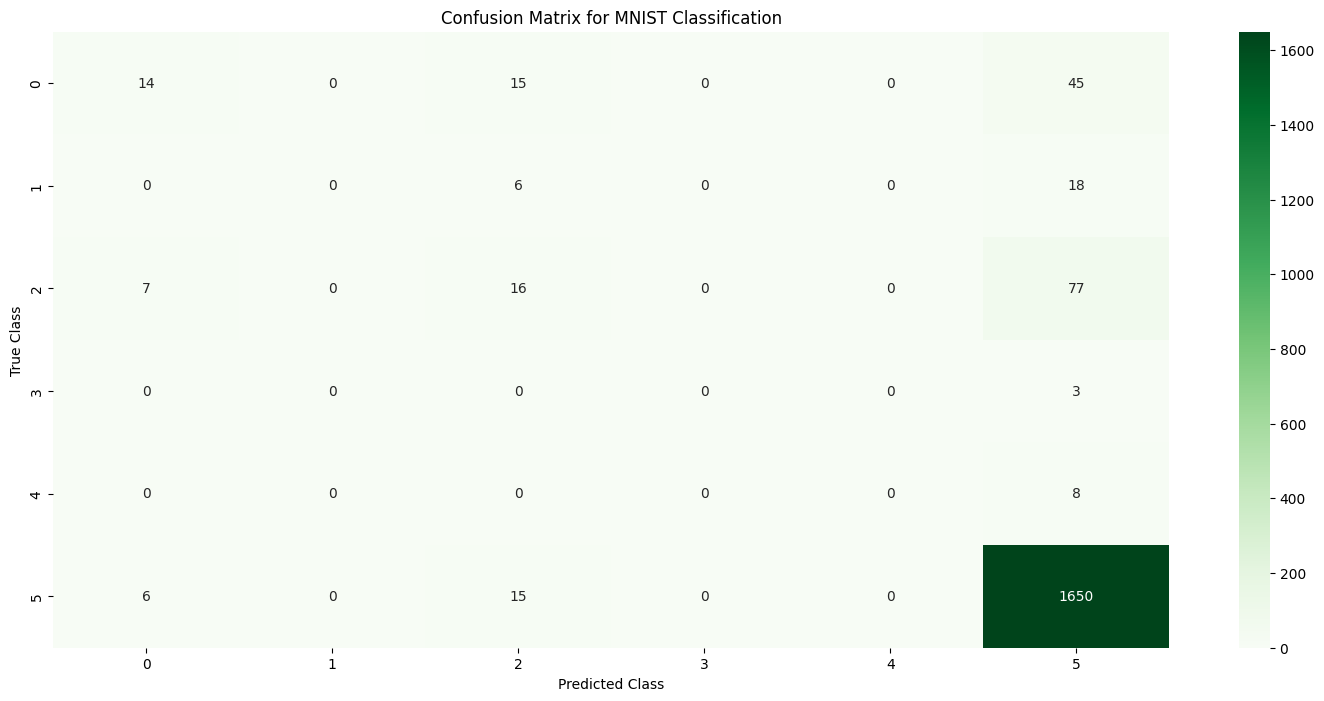

In [439]:
plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=range(6), yticklabels=range(6))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

---